In [ ]:
import torch
import torch.nn as nn
import torchvision 
import matplotlib.pyplot as plt
import PIL
import cv2

# Convolutional Neural Networks

# Convolution

In [ ]:
!wget https://cdn.ndtv.com/tech/images/gadgets/pikachu_hi_pokemon.jpg -O pikachu.jpg

--2022-01-29 05:54:48--  https://cdn.ndtv.com/tech/images/gadgets/pikachu_hi_pokemon.jpg
Resolving cdn.ndtv.com (cdn.ndtv.com)... 23.52.176.146, 2600:1406:5400:58d::24e8, 2600:1406:5400:592::24e8
Connecting to cdn.ndtv.com (cdn.ndtv.com)|23.52.176.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44842 (44K) [image/jpeg]
Saving to: ‘pikachu.jpg’

pikachu.jpg         100%[===================>]  43.79K  --.-KB/s    in 0.009s  

2022-01-29 05:54:48 (4.59 MB/s) - ‘pikachu.jpg’ saved [44842/44842]



Utilicemos opencv para leer la imagen (convertirla a escala de gris) y luego convertir la matriz (de pixeles) en un tensor con el cual PyTorch pueda hacer operaciones

In [ ]:
I = cv2.imread("pikachu.jpg",cv2.IMREAD_GRAYSCALE)
print(I.shape)
I1 = torch.from_numpy(I).float().reshape(1,1,600,800)
print(I1.shape)

(600, 800)
torch.Size([1, 1, 600, 800])


Realicemos lo mismo pero ahora utlizando la libreria PIL (Python Image Library) y algunas herramientas que nos brinda Torchvision (paquete especializado en Computer Vision)

In [ ]:
I = PIL.Image.open(open("pikachu.jpg","rb"))
transf = torchvision.transforms.Compose([
  torchvision.transforms.Grayscale(),
  torchvision.transforms.ToTensor()
])
I1 = transf(I)
I1 = I1.reshape(1,1,600,800)

Veamos un ejemplo de convolución entre matrices

In [ ]:
F = torch.tensor([[0,1,0],[1,-4,1],[0,1,0]]).float().reshape(1,1,3,3)
I2 = torch.conv2d(I1,F)

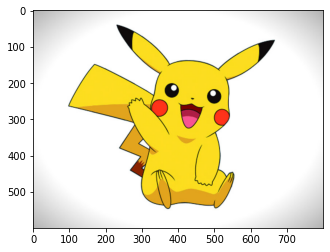

In [ ]:
plt.imshow(I,cmap="hot")

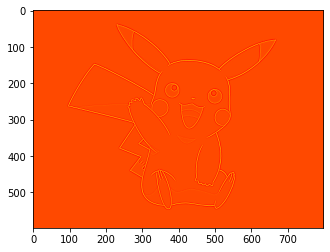

In [ ]:
plt.imshow(I2.reshape(598,798).numpy(),cmap="hot")

Veamos con una matriz más pequeña la como se realiza esta operación y como se realiza el backpropagation en esta operación

In [ ]:
A = torch.arange(1,10).reshape(1,1,3,3).float().requires_grad_(True)
F = torch.tensor([[1,2],[3,4]]).reshape(1,1,2,2).float().requires_grad_(True)
print(A)
print(F)

tensor([[[[1., 2., 3.],
          [4., 5., 6.],
          [7., 8., 9.]]]], requires_grad=True)
tensor([[[[1., 2.],
          [3., 4.]]]], requires_grad=True)


In [ ]:
B = torch.conv2d(A,F)
print(B)
tot = torch.sum(B*B)
print(tot)

tensor([[[[37., 47.],
          [67., 77.]]]], grad_fn=<ThnnConv2DBackward0>)
tensor(13996., grad_fn=<SumBackward0>)


In [ ]:
tot.backward()

In [ ]:
d_B = 2*B
print(d_B)

tensor([[[[ 74.,  94.],
          [134., 154.]]]], grad_fn=<MulBackward0>)


In [ ]:
F.grad

tensor([[[[1568., 2024.],
          [2936., 3392.]]]])

In [ ]:
torch.conv2d(A,d_B)

tensor([[[[1568., 2024.],
          [2936., 3392.]]]], grad_fn=<ThnnConv2DBackward0>)

In [ ]:
A.grad

tensor([[[[  74.,  242.,  188.],
          [ 356., 1000.,  684.],
          [ 402.,  998.,  616.]]]])

In [ ]:
torch.conv2d(d_B,F.flip(0,1,3,2),padding=1)

tensor([[[[  74.,  242.,  188.],
          [ 356., 1000.,  684.],
          [ 402.,  998.,  616.]]]], grad_fn=<ThnnConv2DBackward0>)

Convolutional Layer utilizado en las redes neuronales

In [ ]:
conv_layer = nn.Conv2d(1,3,kernel_size=3)

In [ ]:
for param in conv_layer.parameters():
  print(param.shape)

torch.Size([3, 1, 3, 3])
torch.Size([3])


In [ ]:
x = torch.rand(10,1,5,5)

In [ ]:
conv_layer(x).shape

torch.Size([10, 3, 3, 3])

# Pooling Layers

Otros de los layers más utilizados en redes neuronales son los pooling layers.

# Max Pooling Layers

Dentro de los pooling layers, talvez el que más se utiliza son los max pool layers, debido al bajo coste computacional y a su eficiencia que se ha demostrado experimentalmente.

In [ ]:
max_pool = nn.MaxPool2d(kernel_size=2)

Veamos el tipo de operación que realiza el max pooling layer

In [ ]:
x = torch.randint(low=0,high=10,size=(1,1,6,6)).float()
print(x)

tensor([[[[6., 0., 8., 7., 9., 4.],
          [0., 6., 1., 4., 7., 1.],
          [1., 2., 3., 1., 2., 8.],
          [9., 0., 2., 7., 0., 7.],
          [3., 4., 7., 1., 1., 1.],
          [5., 6., 0., 1., 5., 6.]]]])


In [ ]:
max_pool(x)

tensor([[[[6., 8., 9.],
          [9., 7., 8.],
          [6., 7., 6.]]]])

# Average Pooling Layers

In [ ]:
avg_pool = nn.AvgPool2d(kernel_size=2)

In [ ]:
x = torch.randint(low=0,high=10,size=(1,1,4,4)).float()
print(x)

tensor([[[[6., 0., 9., 3.],
          [9., 4., 9., 9.],
          [6., 6., 9., 3.],
          [3., 5., 2., 0.]]]])


In [ ]:
avg_pool(x)

tensor([[[[4.7500, 7.5000],
          [5.0000, 3.5000]]]])

# Adaptive Average Pooling Layers

In [ ]:
x = torch.randint(low=0,high=10,size=(1,3,2,2)).float()
print(x)

tensor([[[[2., 9.],
          [1., 8.]],

         [[7., 3.],
          [5., 0.]],

         [[7., 1.],
          [5., 2.]]]])


In [ ]:
adap_avg_pool = nn.AdaptiveAvgPool2d(1)

In [ ]:
adap_avg_pool(x)

tensor([[[[5.0000]],

         [[3.7500]],

         [[3.7500]]]])

# Dropout Layers

Uno de los grandes problemas recurrentes en el entrenamiento de redes neuronales, es el "sobreentrenamiento" o "overfitting". Esto significa que el modelo se ha adecuado tanto a los datos de entrenamiento que no produce buenas predicciones para nuevos datos. Para evitar este tipo de problemas se utilizan métodos de regularización (como L1 and L2 regularization methods en problemas de regresión), pero en el mundo de redes neuronales los dropout layers son los más utilizados. 

In [ ]:
drop_layer = nn.Dropout2d(p=0.5)

In [ ]:
x = torch.randint(low=0,high=10,size=(1,3,2,2)).float()
print(x)

tensor([[[[9., 3.],
          [7., 1.]],

         [[3., 7.],
          [3., 4.]],

         [[6., 9.],
          [8., 2.]]]])


In [ ]:
drop_layer(x)

tensor([[[[ 0.,  0.],
          [ 0.,  0.]],

         [[ 0.,  0.],
          [ 0.,  0.]],

         [[12., 18.],
          [16.,  4.]]]])

# Batch Normalization Layers

Otro de los layers muy utilizados son los batch norm layers. Básicamente estos layers reescalan los datos utilizando una media y una variación que se va calculando durando el entrenamiento. Esto permite que los valores que se van pasando entre los layers de la red neuronal no exploten y crezcan descontroladamente.

Veamos un ejemplo de como el batch norm layer opera

In [ ]:
x = torch.randint(low=0,high=10,size=(1,3,4,4)).float()

In [ ]:
bn_layer = nn.BatchNorm2d(3)

In [ ]:
print(bn_layer.running_mean)
print(bn_layer.running_var)

tensor([0., 0., 0.])
tensor([1., 1., 1.])


In [ ]:
bn_layer(x)

tensor([[[[ 0.3508, -1.7541,  0.7016,  1.0525],
          [ 0.3508,  1.0525,  0.3508, -0.3508],
          [ 0.7016, -1.7541,  0.3508, -1.4033],
          [-0.7016, -1.0525,  0.7016,  1.4033]],

         [[ 1.3697,  0.7524, -0.7910,  0.4437],
          [ 0.7524, -0.1736, -1.0996, -0.4823],
          [-1.4083,  1.3697, -1.0996,  1.0610],
          [-1.4083,  0.1350,  1.3697, -0.7910]],

         [[-0.7979,  1.2179,  0.5459, -0.4620],
          [ 0.2100,  1.5539, -0.7979, -1.1339],
          [ 1.5539, -0.7979, -0.7979, -1.1339],
          [ 0.8819, -1.4699,  0.5459,  0.8819]]]],
       grad_fn=<NativeBatchNormBackward0>)

In [ ]:
print(bn_layer.running_mean)
print(bn_layer.running_var)

tensor([0.5000, 0.4563, 0.4375])
tensor([1.7667, 2.0196, 1.8450])


Recreemos esta operación

In [ ]:
mu = torch.mean(x,axis=(2,3))
var = torch.var(x,axis=(2,3))
bias_var = torch.var(x,axis=(2,3),unbiased=False)
print(0.9 * 0 + 0.1 * mu, 0.9 * 1 + 0.1  * var )

tensor([[0.5000, 0.4563, 0.4375]]) tensor([[1.7667, 2.0196, 1.8450]])


In [ ]:
(x - mu.reshape(1,3,1,1)) / (bias_var.reshape(1,3,1,1) + 1e-5)** 0.5

tensor([[[[ 0.3508, -1.7541,  0.7016,  1.0525],
          [ 0.3508,  1.0525,  0.3508, -0.3508],
          [ 0.7016, -1.7541,  0.3508, -1.4033],
          [-0.7016, -1.0525,  0.7016,  1.4033]],

         [[ 1.3697,  0.7524, -0.7910,  0.4437],
          [ 0.7524, -0.1736, -1.0996, -0.4823],
          [-1.4083,  1.3697, -1.0996,  1.0610],
          [-1.4083,  0.1350,  1.3697, -0.7910]],

         [[-0.7979,  1.2179,  0.5459, -0.4620],
          [ 0.2100,  1.5539, -0.7979, -1.1339],
          [ 1.5539, -0.7979, -0.7979, -1.1339],
          [ 0.8819, -1.4699,  0.5459,  0.8819]]]])

# Vanishing Gradient Problem

Otro de los problemas recurrentes cuando se entrenan redes neuronales, es el problema del desvanecimiento del gradiente. Especialmente en redes neuronales grandes (deep neuronal networks), al momento de realizar el backpropagation, debido a la cantidad de layers, el gradiente que se propaga se vuelve cada vez más pequeño haciendo que los primeros layers no se entrenen apropiadamente o que se demoren en entrenarse en comparación con los layers más próximos a la última capa.

Veamos un ejemplo de esto

In [ ]:
model = nn.Sequential(
    nn.Linear(2,3),
    nn.Sigmoid(),
    nn.Linear(3,5),
    nn.Sigmoid(),
    nn.Linear(5,5),
    nn.Sigmoid(),
    nn.Linear(5,5),
    nn.Sigmoid(),
    nn.Linear(5,1),
    nn.Sigmoid(),
)

In [ ]:
x = torch.rand(1,2)
y = torch.ones(1,1)

In [ ]:
crit = nn.MSELoss()

In [ ]:
l = crit(model(x),y)
l.backward()

In [ ]:
for param in model.parameters():
  print(param.grad)

tensor([[-1.6474e-06, -1.7902e-06],
        [ 1.0155e-05,  1.1036e-05],
        [ 3.9242e-06,  4.2643e-06]])
tensor([-4.8077e-06,  2.9637e-05,  1.1452e-05])
tensor([[ 3.5826e-05,  3.7056e-05,  4.6679e-05],
        [ 2.2214e-05,  2.2977e-05,  2.8944e-05],
        [ 2.0615e-05,  2.1323e-05,  2.6860e-05],
        [ 5.9569e-05,  6.1614e-05,  7.7614e-05],
        [-1.0052e-04, -1.0397e-04, -1.3097e-04]])
tensor([ 6.5155e-05,  4.0400e-05,  3.7492e-05,  1.0834e-04, -1.8282e-04])
tensor([[-9.7971e-05, -7.9531e-05, -1.1294e-04, -7.6158e-05, -7.8179e-05],
        [-6.4872e-04, -5.2662e-04, -7.4785e-04, -5.0429e-04, -5.1767e-04],
        [-7.1025e-04, -5.7657e-04, -8.1878e-04, -5.5212e-04, -5.6677e-04],
        [ 1.8212e-04,  1.4785e-04,  2.0995e-04,  1.4158e-04,  1.4533e-04],
        [ 5.8031e-04,  4.7109e-04,  6.6899e-04,  4.5111e-04,  4.6308e-04]])
tensor([-0.0001, -0.0009, -0.0010,  0.0003,  0.0008])
tensor([[-0.0063, -0.0065, -0.0052, -0.0039, -0.0074],
        [-0.0067, -0.0069, -0.0055, -0

Para solucionar este problema, se utilizan los skip connections. Básicamente consiste en "conectar" la entrada con la salida de un layer (de ahi el nombre de skip o "shortcut"), esta conexión permite que el gradiente pase por ahi sin reducirse mucho. 

In [ ]:
class SkipLinear(nn.Module):
  def __init__(self,in_features,out_features):
    super().__init__()
    self.fc = nn.Linear(in_features,out_features)
    self.shortcut = torch.eye(n = in_features, m = out_features)
  def forward(self,x):
    return x @ self.shortcut + torch.sigmoid(self.fc(x))

In [ ]:
model = nn.Sequential(
    SkipLinear(2,3),
    SkipLinear(3,5),
    SkipLinear(5,5),
    SkipLinear(5,5),
    nn.Linear(5,1),
    nn.Sigmoid(),
)

In [ ]:
l = crit(model(x),y)
l.backward()

In [ ]:
for param in model.parameters():
  print(param.grad)

tensor([[-0.0007, -0.0008],
        [ 0.0048,  0.0053],
        [-0.0063, -0.0068]])
tensor([-0.0021,  0.0141, -0.0184])
tensor([[-0.0003, -0.0004, -0.0003],
        [ 0.0107,  0.0118,  0.0084],
        [-0.0140, -0.0154, -0.0110],
        [ 0.0025,  0.0027,  0.0020],
        [ 0.0023,  0.0025,  0.0018]])
tensor([-0.0005,  0.0154, -0.0201,  0.0036,  0.0033])
tensor([[ 0.0006,  0.0007,  0.0006,  0.0001,  0.0002],
        [ 0.0106,  0.0118,  0.0103,  0.0025,  0.0042],
        [-0.0198, -0.0220, -0.0191, -0.0047, -0.0079],
        [ 0.0072,  0.0080,  0.0069,  0.0017,  0.0029],
        [ 0.0029,  0.0032,  0.0028,  0.0007,  0.0011]])
tensor([ 0.0006,  0.0095, -0.0177,  0.0064,  0.0026])
tensor([[-0.0024, -0.0020, -0.0021, -0.0009, -0.0012],
        [ 0.0204,  0.0166,  0.0173,  0.0077,  0.0105],
        [-0.0282, -0.0229, -0.0239, -0.0107, -0.0144],
        [ 0.0043,  0.0035,  0.0036,  0.0016,  0.0022],
        [ 0.0020,  0.0017,  0.0017,  0.0008,  0.0010]])
tensor([-0.0013,  0.0113, -0.0157

# ResNet: Residual Neural Networks

Uno de las rede convolucionales más famosas tal vez sean las redes residuales. Este tipo de redes son básicamente, redes convolucionales muy grandes (profundas) que utilizan skip connections.

Veamos un ejemplo de una red residual

In [ ]:
cifar10_train_ds = torchvision.datasets.CIFAR10("./",train=True,download=True,transform=torchvision.transforms.ToTensor())
cifar10_test_ds = torchvision.datasets.CIFAR10("./",train=False,download=True,transform=torchvision.transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
cifar10_labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

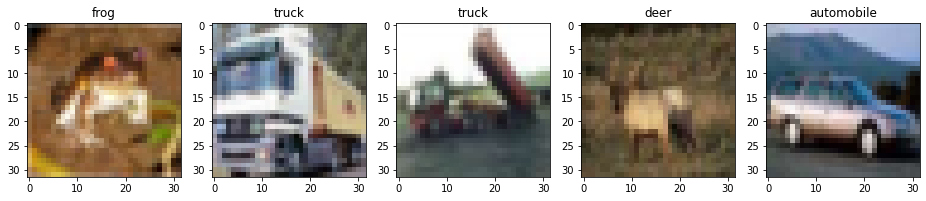

In [ ]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i, (x,y) in enumerate(cifar10_train_ds):
  if i == N:
    break
  axs[i].imshow(x.reshape(3,32,32).numpy().transpose(1,2,0))
  axs[i].set_title(cifar10_labels[y])

In [ ]:
cifar10_train_dl = torch.utils.data.DataLoader(cifar10_train_ds,batch_size=128)
cifar10_test_dl = torch.utils.data.DataLoader(cifar10_test_ds,batch_size=128)

In [ ]:
dev = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def evaluate(model, loader, crit):
  model.eval()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in loader:
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()
    total += len(y)
  acc = 100* corrects / total
  avg_loss /= len(loader)  
  return avg_loss, acc

def train_one_epoch(model, train_loader, crit, optim):
  model.train()
  total = 0
  corrects = 0
  avg_loss = 0
  for x, y in train_loader:
    optim.zero_grad()
    x = x.to(dev)
    y = y.to(dev)
    o = model(x)
    loss = crit(o,y)
    avg_loss += loss.item()
    loss.backward()
    optim.step()
    corrects += torch.sum(torch.argmax(o,axis=1) == y).item()
    total += len(y)
  acc = 100 * corrects / total
  avg_loss /= len(train_loader)
  return avg_loss, acc

def train(model, train_loader, test_loader, crit, optim, epochs = 20):
  for epoch in range(epochs):
    train_loss, train_acc = train_one_epoch(model, train_loader,crit, optim)
    test_loss, test_acc = evaluate(model, test_loader, crit)
    print(f"epoch: {epoch}, train loss: {train_loss}, train acc: {train_acc}%, test loss: {test_loss}, test acc: {test_acc}%")

Definamos nuestro "Bloque residual".

In [ ]:
class BasicResBlock(nn.Module):
  def __init__(self,in_planes, out_planes, kernel_size=3, stride=1,padding=1):
    super().__init__()
    self.conv1 = nn.Conv2d(in_planes, out_planes, kernel_size=kernel_size,stride=stride,padding=padding,bias=False)
    self.bn1 = nn.BatchNorm2d(out_planes)
    self.relu1 = nn.ReLU(inplace=True)
    self.conv2 = nn.Conv2d(out_planes, out_planes, kernel_size=kernel_size,stride=1,padding=padding,bias=False)
    self.bn2 = nn.BatchNorm2d(out_planes)
    self.relu2 = nn.ReLU()
    self.shortcut = nn.Sequential()
    if stride > 1 or in_planes != out_planes:
      self.shortcut = nn.Sequential(
          nn.Conv2d(in_planes,out_planes,kernel_size=1,stride=stride,padding=0,bias=False),
          nn.BatchNorm2d(out_planes)
      )
  def forward(self,x):
    o = self.conv1(x)
    o = self.bn1(o)
    o = self.relu1(o)
    o = self.conv2(o)
    o = self.bn2(o)
    o = self.relu2(self.shortcut(x) + o)
    return o

Construyamos nuestro model utilizando los bloques residuales que definimos antes.

In [ ]:
cifar10_model = nn.Sequential(
    BasicResBlock(3,16),
    nn.MaxPool2d(kernel_size=2),
    BasicResBlock(16,32),
    nn.MaxPool2d(kernel_size=2),
    BasicResBlock(32,64),
    nn.MaxPool2d(kernel_size=2),
    BasicResBlock(64,128),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(512,128),
    nn.ReLU(inplace=True),
    nn.Linear(128,10)
).to(dev)

Entrenemos nuestra red neuronal

In [ ]:
crit = nn.CrossEntropyLoss()
optim = torch.optim.SGD(cifar10_model.parameters(),lr=0.01)

train(cifar10_model, cifar10_train_dl, cifar10_test_dl, crit, optim, epochs=10)

epoch: 0, train loss: 1.5598378593049695, train acc: 43.2%, test loss: 1.3338598646695101, test acc: 51.55%
epoch: 1, train loss: 1.1557491767741834, train acc: 58.322%, test loss: 1.163758467269849, test acc: 57.86%
epoch: 2, train loss: 0.9679951367475798, train acc: 65.488%, test loss: 1.096148548246939, test acc: 60.8%
epoch: 3, train loss: 0.8410213761927222, train acc: 70.186%, test loss: 1.0156754828706573, test acc: 64.5%
epoch: 4, train loss: 0.7416981981538445, train acc: 73.928%, test loss: 0.9517272371280042, test acc: 66.99%
epoch: 5, train loss: 0.6555857122554194, train acc: 77.37%, test loss: 0.9725156245352347, test acc: 66.71%
epoch: 6, train loss: 0.5762002197525385, train acc: 80.342%, test loss: 1.0524480237236506, test acc: 65.53%
epoch: 7, train loss: 0.5010501058662639, train acc: 83.294%, test loss: 1.0397599422478978, test acc: 66.19%
epoch: 8, train loss: 0.42794071736238193, train acc: 86.106%, test loss: 1.0396722298634202, test acc: 66.97%
epoch: 9, train 

In [ ]:
cifar10_model.eval()

Sequential(
  (0): BasicResBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
    (shortcut): Sequential(
      (0): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): BasicResBlock(
    (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kern

Veamos algunas predicciones

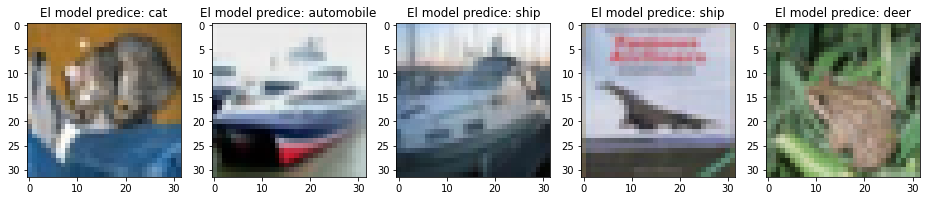

In [ ]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i,(x, y) in enumerate(iter(cifar10_test_ds)):
  if i == N:
    break
  x = x.reshape(1,3,32,32).to(dev)
  ypred = cifar10_model(x.to(dev))
  axs[i].imshow(x.cpu().reshape(3,32,32).numpy().transpose(1,2,0))
  axs[i].set_title(f"El model predice: {cifar10_labels[torch.argmax(ypred)]}")

Utilizemos otro dataset: CIFAR10


In [ ]:
cifar100_train_ds = torchvision.datasets.CIFAR100("./",train=True,download=True,transform=torchvision.transforms.ToTensor())
cifar100_test_ds = torchvision.datasets.CIFAR100("./",train=False,download=True,transform=torchvision.transforms.ToTensor())

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./cifar-100-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
import functools

cifar100_superclass = [['beaver', 'dolphin', 'otter', 'seal', 'whale'],
              ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
              ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
              ['bottle', 'bowl', 'can', 'cup', 'plate'],
              ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
              ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
              ['bed', 'chair', 'couch', 'table', 'wardrobe'],
              ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
              ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
              ['bridge', 'castle', 'house', 'road', 'skyscraper'],
              ['cloud', 'forest', 'mountain', 'plain', 'sea'],
              ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
              ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
              ['crab', 'lobster', 'snail', 'spider', 'worm'],
              ['baby', 'boy', 'girl', 'man', 'woman'],
              ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
              ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
              ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
              ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
              ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']]

cifar100_labels = sorted(functools.reduce(lambda a,b: a + b, cifar100_superclass))

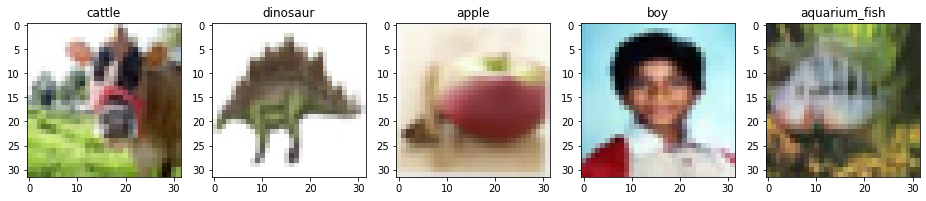

In [ ]:
N = 5
fig, axs = plt.subplots(1,N,figsize=(16,8))
for i, (x,y) in enumerate(cifar100_train_ds):
  if i == N:
    break
  axs[i].imshow(x.reshape(3,32,32).numpy().transpose(1,2,0))
  axs[i].set_title(cifar100_labels[y])

In [ ]:
cifar100_train_dl = torch.utils.data.DataLoader(cifar100_train_ds, batch_size = 128)
cifar100_test_dl = torch.utils.data.DataLoader(cifar100_test_ds, batch_size = 128)

In [ ]:
cifar100_model = nn.Sequential(
    BasicResBlock(3,16),
    nn.MaxPool2d(kernel_size=2),
    BasicResBlock(16,32),
    nn.MaxPool2d(kernel_size=2),
    BasicResBlock(32,64),
    nn.MaxPool2d(kernel_size=2),
    BasicResBlock(64,128),
    nn.MaxPool2d(kernel_size=2),
    nn.Flatten(),
    nn.Linear(512,256),
    nn.ReLU(inplace=True),
    nn.Linear(256,100)
).to(dev)

In [ ]:
crit = nn.CrossEntropyLoss()
optim = torch.optim.Adam(cifar100_model.parameters(), lr=0.01)

train(cifar100_model, cifar100_train_dl, cifar100_test_dl,crit,optim,epochs=10)

epoch: 0, train loss: 3.9955804713851655, train acc: 7.606%, test loss: 3.656052296674704, test acc: 12.09%
epoch: 1, train loss: 3.3831156025762144, train acc: 17.112%, test loss: 3.335155963897705, test acc: 17.99%
epoch: 2, train loss: 3.0627322520136526, train acc: 23.066%, test loss: 3.0283568237401264, test acc: 23.88%
epoch: 3, train loss: 2.8430573275631956, train acc: 27.282%, test loss: 2.929079107091397, test acc: 25.57%
epoch: 4, train loss: 2.658494188962385, train acc: 30.9%, test loss: 2.79584034485153, test acc: 29.05%
epoch: 5, train loss: 2.48882836271125, train acc: 34.094%, test loss: 2.7710394466979595, test acc: 30.72%
epoch: 6, train loss: 2.328634625200725, train acc: 37.566%, test loss: 2.6863004376616657, test acc: 32.1%
epoch: 7, train loss: 2.177242443994488, train acc: 40.706%, test loss: 2.6544710382630554, test acc: 34.12%
epoch: 8, train loss: 2.0428274034539147, train acc: 43.614%, test loss: 2.6160182500187354, test acc: 35.33%
epoch: 9, train loss: 1.

In [ ]:
cifar100_model.eval()

Sequential(
  (0): BasicResBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
    (shortcut): Sequential(
      (0): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): BasicResBlock(
    (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(32, 32, kern

In [ ]:
M = 4
N = 5

In [ ]:
soft_max = nn.Softmax(dim=1)

In [ ]:
ypred_ = []
for i, (x, y) in enumerate(iter(cifar100_test_ds)):
  if i == N*M:
    break
  x = x.reshape(1,3,32,32).to(dev)
  ypred_.append(soft_max(cifar100_model(x).cpu().detach()))

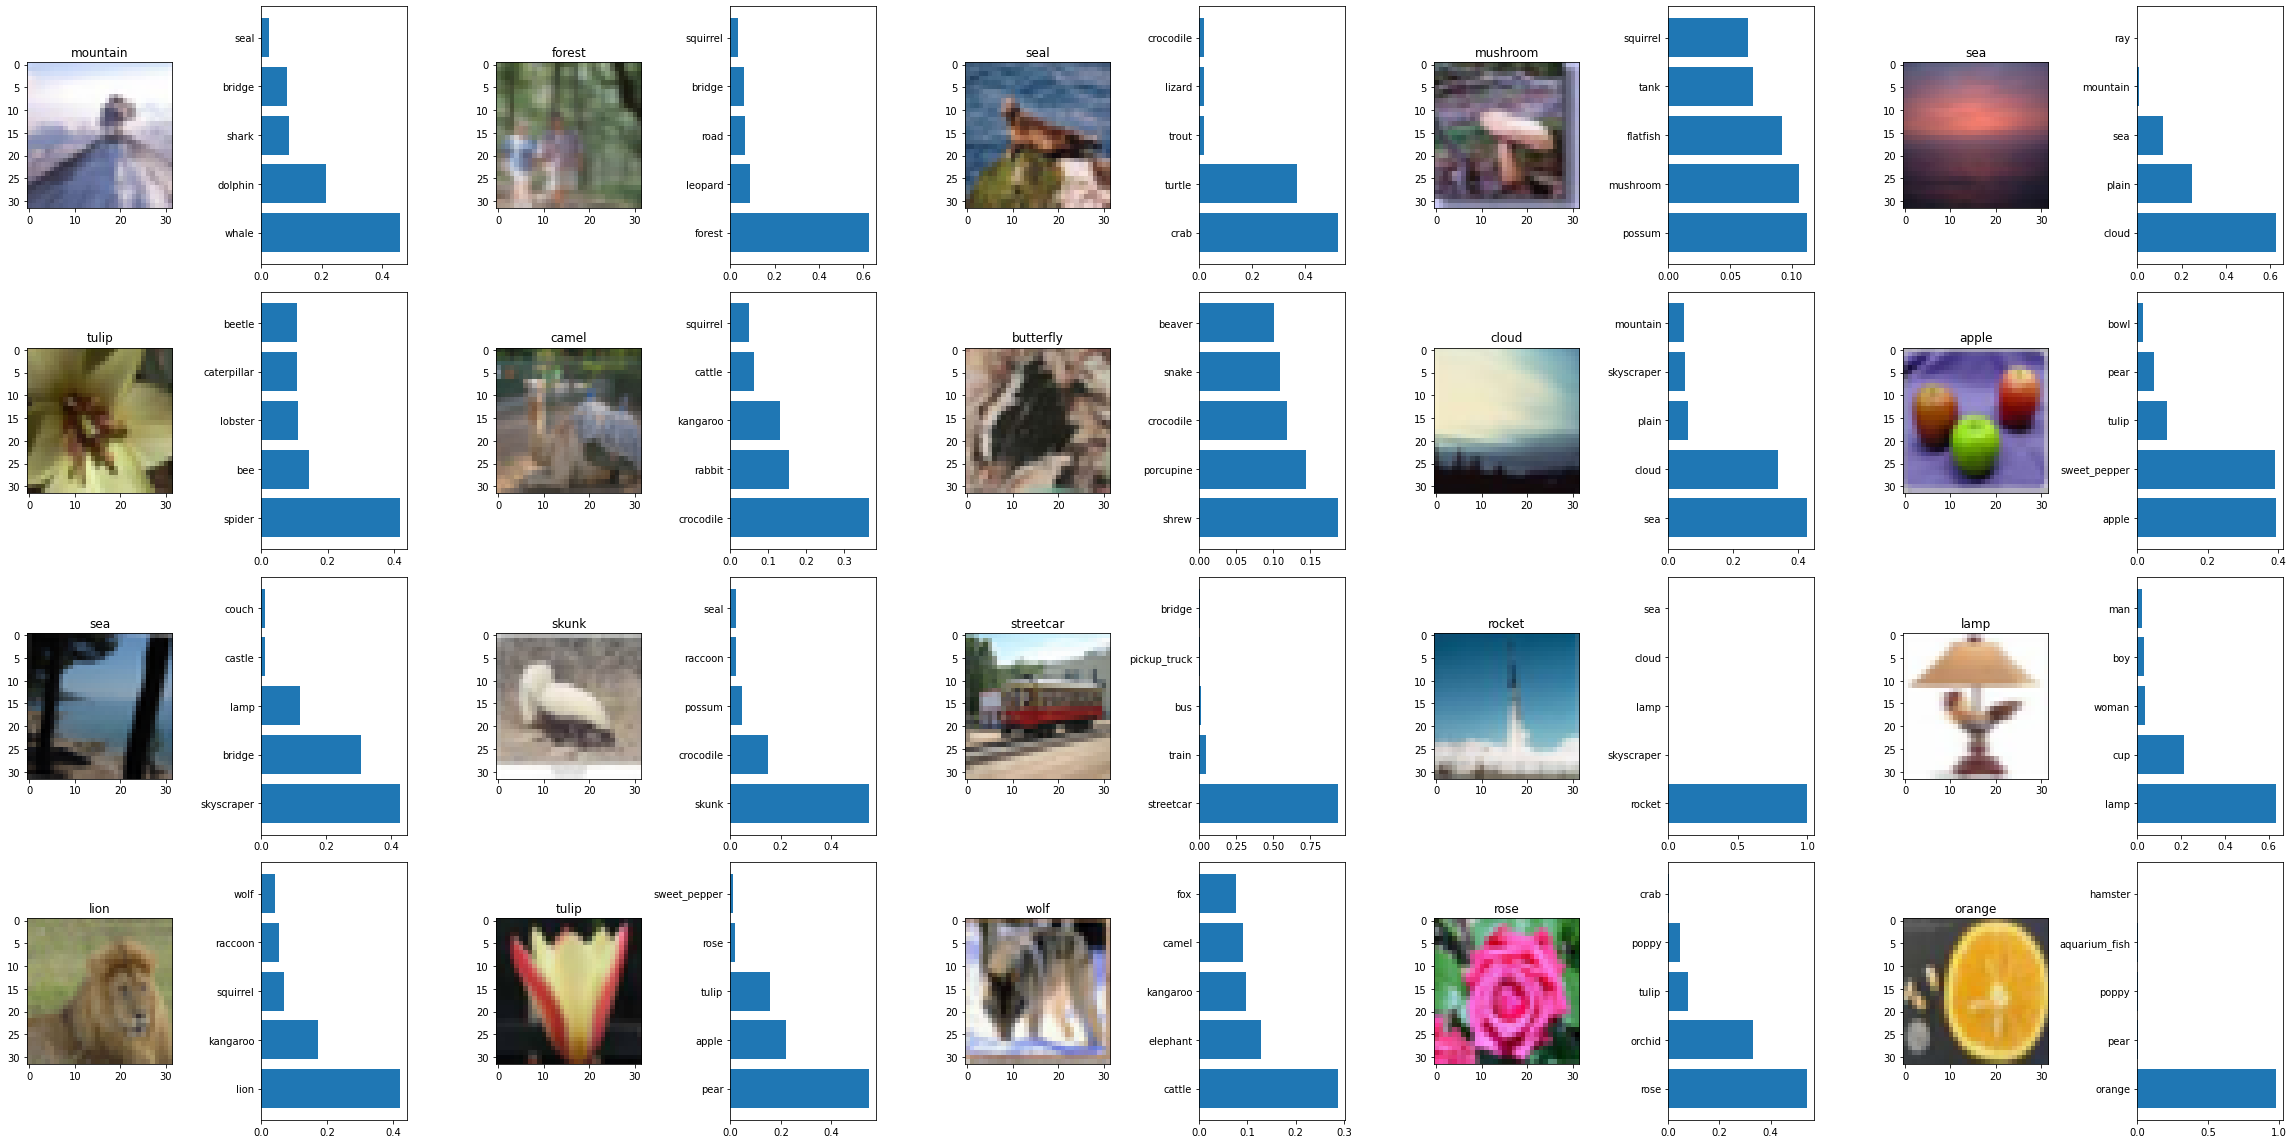

In [ ]:
fig, axs = plt.subplots(M,2*N,figsize=(32,4*M))
for i,(x, y) in enumerate(iter(cifar100_test_ds)):
  if i == N*M:
    break
  axs[i//N, 2*(i%N)].imshow(x.reshape(3,32,32).numpy().transpose(1,2,0))
  axs[i//N, 2*(i%N)].set_title(f"{cifar100_labels[y]}")
  top5_idxs = torch.argsort(ypred_[i][0],descending=True)[:5]
  axs[i//N, 2*(i%N) + 1].barh(list(range(5)),ypred_[i][0][top5_idxs].numpy())
  axs[i//N, 2*(i%N) + 1].set_yticks(list(range(5)))
  axs[i//N, 2*(i%N) + 1].set_yticklabels([cifar100_labels[i] for i in top5_idxs])
plt.tight_layout()

Veamos un model (resnet18) pre entrenado en el dataset Imagenet1K.

In [ ]:
resnet18_model = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
!wget https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt

with open("imagenet1000_clsidx_to_labels.txt","r") as f:
  img1k_labels_ = f.readlines()

--2022-01-29 07:32:00--  https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30564 (30K) [text/plain]
Saving to: ‘imagenet1000_clsidx_to_labels.txt’

imagenet1000_clsidx 100%[===================>]  29.85K  --.-KB/s    in 0.002s  

2022-01-29 07:32:00 (13.7 MB/s) - ‘imagenet1000_clsidx_to_labels.txt’ saved [30564/30564]



In [ ]:
import functools

img1k_labels_ = functools.reduce(lambda a, b: a+b, img1k_labels_)
img1k_labels = eval(img1k_labels_)

In [ ]:
!wget https://i.pinimg.com/originals/a1/b6/e1/a1b6e19e01422fa942aad1a8985130b5.png -O dog_poodle.png

--2022-01-29 07:32:08--  https://i.pinimg.com/originals/a1/b6/e1/a1b6e19e01422fa942aad1a8985130b5.png
Resolving i.pinimg.com (i.pinimg.com)... 23.11.224.196, 2a04:4e42:3e::84
Connecting to i.pinimg.com (i.pinimg.com)|23.11.224.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553043 (540K) [image/png]
Saving to: ‘dog_poodle.png’

dog_poodle.png      100%[===================>] 540.08K  --.-KB/s    in 0.06s   

2022-01-29 07:32:09 (9.37 MB/s) - ‘dog_poodle.png’ saved [553043/553043]



In [ ]:
transf_img = torchvision.transforms.Compose([
  torchvision.transforms.Resize(256),
  torchvision.transforms.RandomResizedCrop(224),
  torchvision.transforms.ToTensor(),
  torchvision.transforms.Normalize([0.485, 0.456, 0.406,0], [0.229, 0.224, 0.225,1])
                                            
])

In [ ]:
I = PIL.Image.open(open("dog_poodle.png","rb"))
I1 = transf_img(I)
x = I1[:3,:,:].reshape(1,3,224,224)

In [ ]:
resnet18_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
img1k_labels[torch.argmax(resnet18_model(x)).item()]

'toy poodle'